# Project 6

## The basic expectation from textbook

**The dataset from the textbook**

In [45]:
loan_amount = [1250.0, 500.0, 1450.0, 200.0, 700.0, 100.0, 250.0, 225.0, 1200.0, 150.0, 600.0, 300.0, 700.0, 125.0, 650.0, 175.0, 1800.0, 1525.0, 575.0, 700.0, 1450.0, 400.0, 200.0, 1000.0, 350.0]

country_name = ['Azerbaijan', 'El Salvador', 'Bolivia', 'Paraguay', 'El Salvador', 'Philippines', 'Philippines', 'Nicaragua', 'Guatemala', 'Philippines', 'Paraguay', 'Philippines', 'Bolivia', 'Philippines', 'Philippines', 'Madagascar', 'Georgia', 'Uganda', 'Kenya', 'Tajikistan', 'Jordan', 'Kenya', 'Philippines', 'Ecuador', 'Kenya']

time_to_raise = [193075.0, 1157108.0, 1552939.0, 244945.0, 238797.0, 1248909.0, 773599.0, 116181.0, 2288095.0, 51668.0, 26717.0, 48030.0, 1839190.0, 71117.0, 580401.0, 800427.0, 1156218.0, 1166045.0, 2924705.0, 470622.0, 24078.0, 260044.0, 445938.0, 201408.0, 2370450.0]

num_lenders_total = [38, 18, 51, 3, 21, 1, 10, 8, 42, 1, 18, 6, 28, 5, 16, 7, 54, 1, 18, 22, 36, 12, 8, 24, 8]

unique_countries = ['Guatemala', 'Paraguay', 'Tajikistan', 'Kenya', 'Azerbaijan', 'El Salvador', 'Bolivia', 'Ecuador', 'Georgia', 'Philippines', 'Uganda', 'Madagascar', 'Nicaragua', 'Jordan']


25 25 25 25


**This is the data we need to calculate.**

We use Function to calculate which makes it more portable in the future.

In [47]:
# Calculate the mean, max, and min of a list
def mean(data_list):
    data_mean = sum(data_list) / len(data_list)
    return data_mean

def max_min(data_list):
    data_max = max(data_list)
    data_min = min(data_list)
    return data_max, data_min

# Calculate the standard deviation of a list
def sd(data_list):
    data_mean = mean(data_list)
    squared_diffs = [(x - data_mean) ** 2 for x in data_list]
    data_var = sum(squared_diffs) / len(squared_diffs)
    data_stdev = data_var ** 0.5
    return data_stdev

# Calculate the Pearson correlation coefficient between two lists
def pearson(list1, list2):
    cov = sum((x - mean(list1)) * (y - mean(list2)) for x, y in zip(list1, list2))
    corr = cov / ((sd(list1) * sd(list2)))
    return corr


**calculate and print the results**

In [50]:
#calculate the data in Level 1
loan_total = sum(loan_amount)
loan_average = mean(loan_amount)
max_loan, min_loan = max_min(loan_amount)
min_country = country_name[loan_amount.index(min_loan)]  # Get the country corresponding to the min loan
max_country = country_name[loan_amount.index(max_loan)]  # Get the country corresponding to the max loan
mean_num_lenders_total = mean(num_lenders_total)

# Print level 1 results
print("Total amount of money loaned:{} ".format(loan_total))
print("Average amount of money loaned: {:.3f}".format(loan_average))
print("Minimum loan amount: {}".format(min_loan))
print("Maximum loan amount: {}".format(max_loan))
print("Country with the smallest loan: {}".format(min_country))
print("Country with the largest loan: {}".format(max_country))
print("Average number of lenders per loan: {}".format(mean_num_lenders_total))
# Print the number of loans made in each unique country
for country in unique_countries:
    count = country_name.count(country)
    print("{} {}".format(country, count))

#Calculate the result in Level 2


longest_to_fund = country_name[time_to_raise.index(max(time_to_raise))]
loan_var = sd(loan_amount) ** 2
loan_stdev=sd(loan_amount)
correlation_loan_lenders = pearson(loan_amount, num_lenders_total)
correlation_loan_ttr = pearson(loan_amount, time_to_raise)
correlation_lenders_ttr = pearson(num_lenders_total, time_to_raise)

# Print Level 2 results
print("The name of the country with the loan that took the longest to raise: {}".format(longest_to_fund))
print("Variance of loan_amount: {:.3f}".format(loan_var))
print("Standard deviation of loan_amount: {:.3f}".format(loan_stdev))
print("Pearson correlation between loan_amount and num_lenders_total: {:.3f}".format(correlation_loan_lenders))
print("Pearson correlation between loan_amount and time_to_raise: {:.3f}".format(correlation_loan_ttr))
print("Pearson correlation between num_lenders_total and time_to_raise: {:.3f}".format(correlation_lenders_ttr))

Total amount of money loaned:16575.0 
Average amount of money loaned: 663.000
Minimum loan amount: 100.0
Maximum loan amount: 1800.0
Country with the smallest loan: Philippines
Country with the largest loan: Georgia
Average number of lenders per loan: 18.24
Guatemala 1
Paraguay 2
Tajikistan 1
Kenya 3
Azerbaijan 1
El Salvador 2
Bolivia 2
Ecuador 1
Georgia 1
Philippines 7
Uganda 1
Madagascar 1
Nicaragua 1
Jordan 1
The name of the country with the loan that took the longest to raise: Kenya
Variance of loan_amount: 250456.000
Standard deviation of loan_amount: 500.456
Pearson correlation between loan_amount and num_lenders_total: 20.076
Pearson correlation between loan_amount and time_to_raise: 4.730
Pearson correlation between num_lenders_total and time_to_raise: 6.064



---


## Let's try something more interesting! How about making some graphs and analyse them?

1. **histogram**

***

Let's try the histogram to determine the loan amount distribution and see which monetary range has the highest number of borrowers.

First: try to define a function histogram()

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def histogram(x,y,datalist):
# Set the figure size
    plt.figure(figsize=(10, 6))

    # Create a histogram
    plt.hist(datalist, bins=15, edgecolor='k', alpha=0.7, density=True, label='Histogram')

    # Generate x values for the fitted curve
    x_value = np.linspace(min(datalist), max(datalist), 1000)

    # Fit a frequency polynomial curve to the histogram
    mu = mean(datalist)
    sigma = sd(datalist)
    pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x_value - mu) ** 2) / (2 * sigma ** 2))

    # Plot the fitted curve
    plt.plot(x_value, pdf, 'r-', label='Fitted Curve')

    # Add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Histogram with Fitted Curve')
    plt.legend()

    # Display the plot
    plt.show()

It seems like more people borrow the money for less than 250. And the fitted curve makes no sense, possibly because our dataset is too small. 

2. **Pearson correlation scatter plot**

***

The question ask us to calculate Pearson correlation to see the relation between two variable. Let's see what it looks like in a scattergram.

1. the relationship between Loan Amount and Time to Raise Funds.

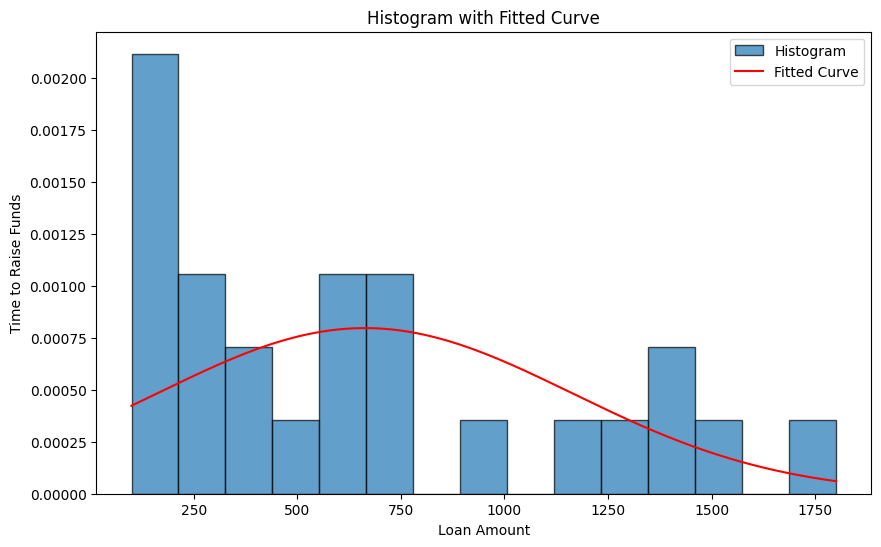

In [35]:
#draw
histogram('Loan Amount','Time to Raise Funds',loan_amount)


When the loan amount increases, the time to raise funds also increases. But the relation is not that strong according to the Pearson correlation and the scattergram.

2. the relationship between Loan Amount and Number of lenders.

**First: create a function to plot scatter**
When I tried to plot the gram and analyze it, I found that the Pearson correlation was wrong, and after searching, I realized the correlation coefficient needed to be corrected. So, instead of thinking and writing the correction by myself, I decided to use NumPy module. 

In [63]:
def scattergram(x,y,datalist_x,datalist_y):
    correlation=pearson(datalist_x,datalist_y)
    plt.scatter(datalist_x, datalist_y, alpha=0.7)
    plt.title(f'Pearson Correlation: {np.corrcoef(datalist_x,datalist_y)[0][1]:0.3f}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()



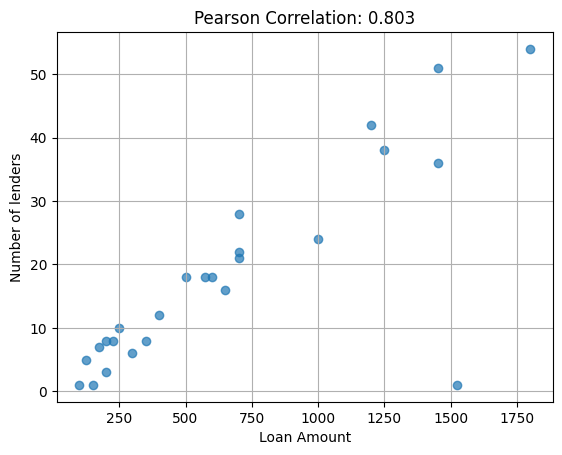

In [64]:
# Create a scatter plot between Loan Amount and number of lender
scattergram('Loan Amount','Number of lenders',loan_amount,num_lenders_total)

When loan amounts increase, the number of lenders seems to increase, and the Pearson correlation after correlation shows a strong positive relationship between them


3. the relationship between Time to Raise Funds and Number of lenders.

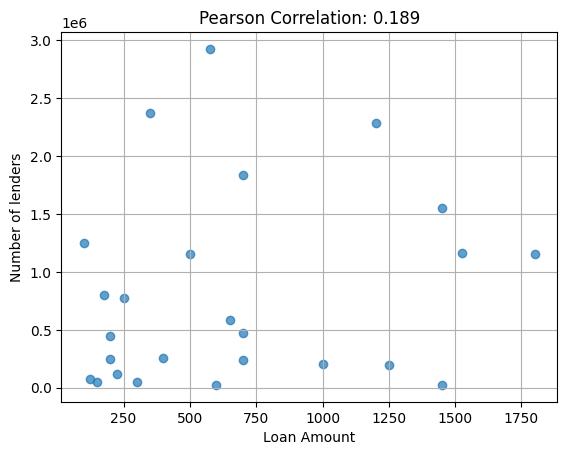

In [65]:
# Create a scatter plot between Loan Amount and number of lender
scattergram('Loan Amount','Number of lenders',loan_amount,time_to_raise)

When loan amounts increase, the number of lenders seems to increase, But the Pearson correlation after correlation shows there is almost no relationship between them.